In [1]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis.audioSegmentation import silenceRemoval

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNC

import os

In [2]:
A = 0   #feature index from 
B = 20  #feature index to 

win_coef  = 0.02  #coef for the short-term window size (in samples)
step_coef = 0.03 #coef for the short-term window step (in samples)

lst = os.listdir("traindataset")
names = []
for i in lst:
    names.append("traindataset/" + i)
names[:10]
len(names)
print(names[1])
print(len(names))

traindataset/mgn_ru_0195.wav
2454


In [3]:
def getClearFramesAndClassForOneAudio(filename):
    [fs, x] = audioBasicIO.readAudioFile(filename)
    #print(fs, x)
    F, names = audioFeatureExtraction.stFeatureExtraction(x, fs, win_coef*fs, step_coef*fs)
    filtered_frames_indeces = silenceRemoval(x, fs, win_coef,  step_coef)
    
    currentClass = filename[13:16]
    classlist = []
    clearFrames = np.array([[0]*B])
    for i in filtered_frames_indeces:       
        clearFrames = np.vstack([clearFrames, F[:,i][:B]])
        classlist.append(currentClass)
    clearFrames = np.delete(clearFrames, 0, 0)
    return clearFrames, classlist
    

In [4]:
allAudiosClearFrames = np.array([[0]*B])
allAudiosClasses = []
for n in names:
    cf, names = getClearFramesAndClassForOneAudio(n)
    allAudiosClearFrames = np.vstack([allAudiosClearFrames, cf])
    allAudiosClasses = allAudiosClasses + names
    
allAudiosClearFrames = np.delete(allAudiosClearFrames, 0, 0)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(allAudiosClearFrames, allAudiosClasses, 
                                                    test_size=0.25, random_state=20)
knntest = KNC(n_neighbors=21, n_jobs=-1)
knntest.fit(X_train, y_train)
print(knntest.score(X_test, y_test))

0.6979621425694724


In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(knntest, 'knntest.pkl') 

In [46]:
def most_frequent(List): 
    return max(set(List), key = List.count)

In [7]:
RES = np.array([])
for i in range(1, 27, 2):
    knntest = KNC(n_neighbors=i, n_jobs=-1)
    knntest.fit(X_train, y_train)
    r = knntest.score(X_test, y_test)
    RES = np.append(RES, r)
    print('for {}'.format(i), sep=' ')
    print('is {}'.format(r))

for 1
is 0.6355859846959323
for 3
is 0.6570761175996778
for 5
is 0.6824164317358035
for 7
is 0.6908095046314942
for 9
is 0.6957229158276279
for 11
is 0.6973016512283527
for 13
is 0.6995086588803866
for 15
is 0.6989448248086991
for 17
is 0.6992347966169956
for 19
is 0.6989448248086991
for 21
is 0.6979621425694724
for 23
is 0.6981071284736207
for 25
is 0.6975916230366492


In [8]:
RES

array([0.63558598, 0.65707612, 0.68241643, 0.6908095 , 0.69572292,
       0.69730165, 0.69950866, 0.69894482, 0.6992348 , 0.69894482,
       0.69796214, 0.69810713, 0.69759162])

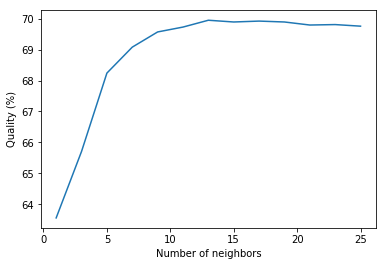

In [12]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, 27, 2)], [RES[i]*100 for i in range(13)])
plt.xlabel('Number of neighbors'); plt.ylabel('Quality (%)')
plt.show()